In [1]:
import os
import pandas as pd
import numpy as np
from scipy.spatial import distance


1. **San Francisco**
* calculate hamming distance - between 'San Francisco' and the list of names. 
    * Create a function
    * if ValueError (triggered by difference lengths) then tag and pass over. 
* cutoff with hamming distance <= 0.1 after looking at the results. 

2. **Los Angeles**

* Calculate hamming distance. Many misspelled Los Angeles names were filtered out because hamming distance was unable to calculate a similarity score for words of different length/number of characters. 

* This illustrates one of the draw back of Hamming Distance. 

3. **Las Vegas**
* Use Levenshtein to determine similarity - calculate the number of insertion + deletion + substitution needed in order to convert each name from the list to "Las Vegas".
    * create a function
    * return array of number of changes needed. 
    * determine the cutoff to identify which city names are similar to "Las Vegas" - set at 2. 

4. **Boston**
* Use Levenshtein to calculate the levenshtein distance. 
* keeping the same cutoff at 2. This will return city names that might not be misspelling of "Boston". 

5. **Berkeley**
* Use Jaccard method to calculate the similarity between two cities. 
    * I will define a function for this.
* Set an appropriate cutoff at >= 0.75. 
    * Having a Jaccard distance of 1 means the words are similar. So all in intersection are in union. 

In [2]:
names = pd.read_csv("CS688_Misspelled_City_names.csv")

***1.1 San Francisco***

In [3]:
def hamming_distance(city, data):
    hamming_score = []
    for i in data:
        try:
            hamming_score.append(distance.hamming(list(city), list(i)))
        except ValueError:
            hamming_score.append('different length')
    return hamming_score

In [4]:
result = hamming_distance('San Francisco', names['Data'])

In [5]:
names['sf_hamming_distance'] = result

In [6]:
ham_results = names[names['sf_hamming_distance'] != 'different length'].sort_values(by = 'sf_hamming_distance', ascending = True)
display(ham_results.head(5))

,Data,sf_hamming_distance
1312,San Francisco,0.0
1311,San Francesco,0.076923
1135,Pananma Beach,0.692308
1025,New Brunswick,0.692308
1049,Niagara Falls,0.846154


Deciding on cutoff at 0.1

Result:

In [7]:
ham_results[ham_results['sf_hamming_distance'] <= 0.1]

,Data,sf_hamming_distance
1312,San Francisco,0.0
1311,San Francesco,0.076923


***

***1.2 Los Angeles***

In [8]:
la_result = hamming_distance('Los Angeles', names['Data'])
names['la_hamming_distance'] = la_result

In [9]:
la = names[names['la_hamming_distance'] != 'different length'].sort_values(by = 'la_hamming_distance')[['Data', 'la_hamming_distance']]
la.head(5)

,Data,la_hamming_distance
873,Los Angeles,0.0
1587,Washingtown,0.727273
676,Hot Springs,0.727273
1401,South Heven,0.727273
1033,New Orleans,0.727273


In [10]:
names[names['Data'].str.contains("Los")]

,Data,sf_hamming_distance,la_hamming_distance
873,Los Angeles,different length,0.0
874,Los Angels,different length,different length
875,Los Angleles,different length,different length
876,Los Angles,different length,different length


We see that with hamming distance, many misspelled words city names for Los Angeles was filtered out. Hamming was unable to calculate a similarity score for these words. 

***

***1.3 Las Vegas***

In [11]:
from Levenshtein import distance as lev

In [12]:
def lev_count(city, names):
    lev_counts = [lev(city, i) for i in names]
    return lev_counts

In [13]:
names['lv_lev_count'] = lev_count('Las Vegas', names.Data)
lv = names.sort_values('lv_lev_count')[['Data', 'lv_lev_count']]

In [14]:
lv.head(6)

,Data,lv_lev_count
820,Las Vegas,0
819,Las Vagas,1
641,Hastings,5
876,Los Angles,5
874,Los Angels,5
1138,Pasadena,5


I will set the cutoff at <= 2 for levenshtein distance

In [15]:
lv[lv['lv_lev_count'] < 2]

,Data,lv_lev_count
820,Las Vegas,0
819,Las Vagas,1


***

***1.4 Boston***

In [16]:
names['boston_lev'] =lev_count('Boston', names.Data)
boston = names.sort_values('boston_lev')[['Data', 'boston_lev']]

In [17]:
# keeping the cutoff at 2 as to prevent overfitting and allow for some variance. 

boston[boston['boston_lev'] <= 2]

,Data,boston_lev
165,Boston,0
166,Bostun,1
674,Hoston,1
194,Brokton,2
193,Brocton,2
689,Huston,2
678,Houston,2
687,Huoston,2
991,Morton,2


Not all these results, which are similar to the spelling of "Boston", are missspelling of this city. Setting the Levenshtein distance upper bound at 2 is returning results that are reffering to different cities e.g. Houston. 

***

**1.5 Berkeley**

In [18]:
def jaccard_distance(city, name):
    jaccard_dis = []
    for i in name:
        num = list(set(city) & set(i))
        den = list(set(city) | set(i))
        jaccard_dis.append(len(num)/len(den))
    return jaccard_dis 

In [19]:
names['berkeley_jaccard'] = jaccard_distance('Berkeley', names.Data)
berkeley = names.sort_values('berkeley_jaccard', ascending = False)[['Data', 'berkeley_jaccard']]
berkeley.head(5)

,Data,berkeley_jaccard
127,Berkly,1.000000
125,Berkley,1.000000
124,Berkeley,1.000000
186,Brinkley,0.750000
185,Brinckley,0.666667


Looks the most appropriate cutoff is at >= 0.75. If the jaccard distance drops below that, we will start getting very different city names. 

* Also I noticed that the Jaccard method does not account for the frequency of each letter/ word that appears in each text. This might be less important for text classification than for detecting misspellings. 

***

> 1. area A, 
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

### 2.a

In [20]:
import urllib
import re
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

In [21]:
import ssl

try: 
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [22]:
file = urllib.request.urlopen(url)

data = []
for line in file:
    decode_line = line.decode('utf-8')
    
    #clean data:
    row = re.split('\t|\n', decode_line)
    row = list(filter(None, row))
    data.append(row)

In [23]:
data = pd.DataFrame(data, columns = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry Coefficient', 'Length Groove', 'Classification'])
data.head(10)

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Length Groove,Classification
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.1,0.8911,5.42,3.302,2.7,5,1
8,16.63,15.46,0.8747,6.053,3.465,2.04,5.877,1
9,16.44,15.25,0.888,5.884,3.505,1.969,5.533,1


### 2.b Feature Engineering and Selection  + 2.c Perform K-Mean Clustering

1. tranformations to normalize the fields if need. 

2. checking for outliers and handle them

3. Compactness is related to Area and Perimeter (compactness C = 4piA/P^2,), so I will perform K-mean cluster with 
   * a. just Area and Perimeter
   * b. just Compactness
   * c. Area, Perimeter, and Compactness
   
> **Approach:**
>   1. for features in data, add to model. (starting from column 4, LENGTH)
>   2. select different random starting points
>   3. find optimal K which gives acceptable total sum of square (**elbow plot - (k, tss)**)
>   4. keep adding features to the model and repeat
    

Notes: 

    Goal: minimize distance between points within a cluster and maximazing distance between clusters

In [24]:
data_tomodel = data.drop(['Classification'], axis = 1)

# converting to float
for i in data_tomodel.columns:
    data_tomodel[i] = data_tomodel[i].astype(float)
data_tomodel.head(5)

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Length Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [25]:
import matplotlib.pyplot as plt

In [26]:

def hist_columns(data):
    fig, ax = plt.subplots(3,3, figsize = (12, 10))
    i = 0
    j = 0
    col = 0
    columns = data.columns
    while col <= len(columns)-1:
        Title = columns[col]
        ax[i,j].hist(data[columns[col]], edgecolor = 'black', bins = 20)
        ax[i,j].set_title(f'Histogram of {Title}', color = 'blue')
        ax[i,j].axvline(data[columns[col]].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
        ax[i,j].axvline(data[columns[col]].median(), color = 'orange', linestyle = 'dashed', linewidth = 2)

        i +=1
        if i >2:
            i = 0
            j +=1
        col +=1 


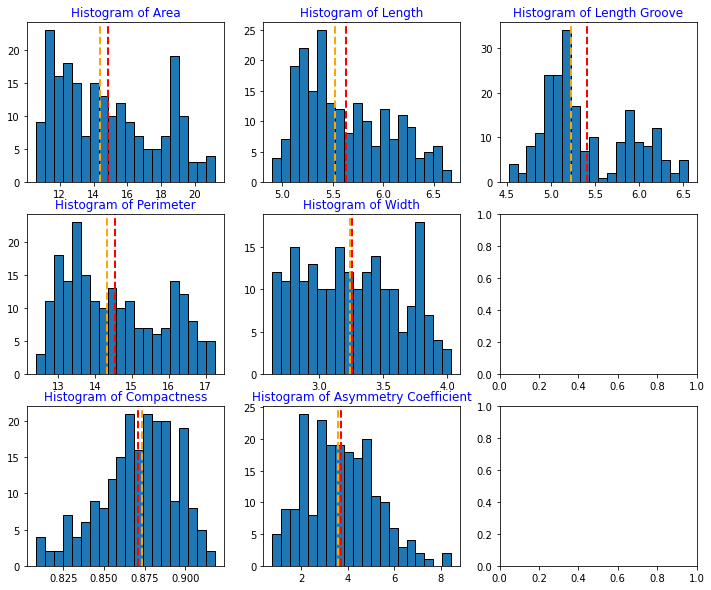

In [27]:
hist_columns(data_tomodel)

Take away: 

* Some distributions are skewed - need to apply log normal transformation


In [28]:
from scipy import stats

In [29]:
def boxcox_cols(data):
    for i in data.columns:
        colname = i
        transf_vect = stats.boxcox(data[i])[0]
        print(i)
        if min(transf_vect) < 0:
            transf_vect = [i + abs(min(transf_vect)) for i in transf_vect]
        data[f'boxcox_{colname}'] =transf_vect
    return data

data_transformed = boxcox_cols(data_tomodel)


Area
Perimeter
Compactness
Length
Width
Asymmetry Coefficient
Length Groove


In [30]:
data_transformed.iloc[:,7:]

,boxcox_Area,boxcox_Perimeter,boxcox_Compactness,boxcox_Length,boxcox_Width,boxcox_Asymmetry Coefficient,boxcox_Length Groove
0,1.334476,0.476704,0.015676,0.320053,1.267674,1.260278,0.348877
1,1.329596,0.476637,0.019171,0.319885,1.274751,0.266122,0.348365
2,1.321609,0.476509,0.028836,0.319632,1.276094,1.586328,0.348069
3,1.315152,0.476466,0.024745,0.319667,1.290113,1.287229,0.348021
4,1.345063,0.476739,0.028122,0.319972,1.349409,0.580087,0.348796
...,...,...,...,...,...,...,...
205,1.288265,0.476231,0.018170,0.319459,1.150396,2.158056,0.348174
206,1.269761,0.476117,0.009673,0.319462,1.079207,2.543715,0.348463
207,1.305365,0.476382,0.021867,0.319573,1.240336,4.381830,0.348571
208,1.281798,0.476235,0.009949,0.319503,1.095261,2.138968,0.348547


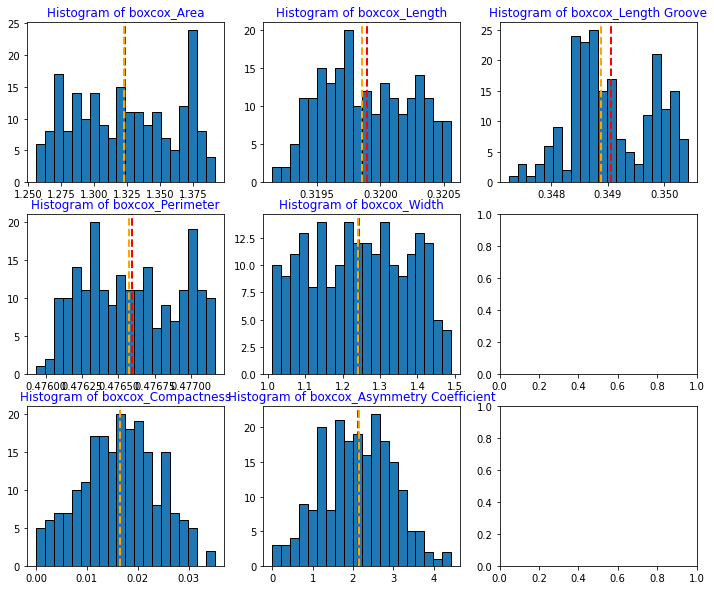

In [31]:
graph = hist_columns(data_transformed.iloc[:,7:])  
graph

**Conclusions**: 
- red line is the mean
- orange line is the median

We see that after applying boxcox tranformation, our distribution for each feature was normalized. The orange and red lines are closer together. This is ideal for our model. 

I don't see any apparent outliers.

***

### Calculating K- Mean

Attributes of sklearn.cluster KMeans

**inertia_**:
* Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

I will be using this value to create elbow plots for analysis.

In [32]:
data_norm = data_transformed.iloc[:,7:]
data_norm.head(5)

,boxcox_Area,boxcox_Perimeter,boxcox_Compactness,boxcox_Length,boxcox_Width,boxcox_Asymmetry Coefficient,boxcox_Length Groove
0,1.334476,0.476704,0.015676,0.320053,1.267674,1.260278,0.348877
1,1.329596,0.476637,0.019171,0.319885,1.274751,0.266122,0.348365
2,1.321609,0.476509,0.028836,0.319632,1.276094,1.586328,0.348069
3,1.315152,0.476466,0.024745,0.319667,1.290113,1.287229,0.348021
4,1.345063,0.476739,0.028122,0.319972,1.349409,0.580087,0.348796


In [33]:
from sklearn.cluster import KMeans

In [55]:
def optimial_k(data, i):
    results = {}
    columns = list(data.columns)
    for k in range(1, 20):
        # try 20 different random starting positions for each k
        kmresult = KMeans(n_clusters = k, n_init = 20).fit(data)
        results[k]= kmresult.inertia_
    x = list(results.keys())
    y = list(results.values())
    plt.figure(figsize=(6, 4))
    plt.plot(x,y, marker = 'o')
    plt.xticks(x)
    plt.title(f"GRAPH # {i} : Elbow Plot for different K Values -\n {columns}", color = 'darkred')
    plt.ylabel("Inertia - TSS", color = 'red')
    plt.xlabel('K - the number of clusters', color = 'red')
    plt.axvline(x = 3, color = 'green', linestyle = 'dashed', linewidth = 2, alpha = 0.15)
    plt.axhline(y = y[2], color = 'green', linestyle = 'dashed', linewidth = 2, alpha = 0.15)

    plt.show()
    print(f"Inertia (TSS) at 5 clusters = {y[2]} \n \n")
    
    

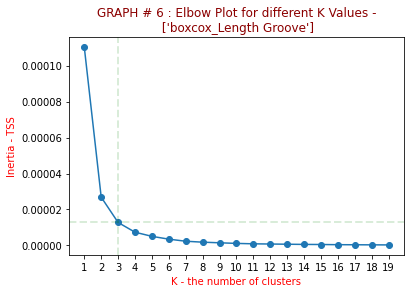

Inertia (TSS) at 5 clusters = 1.2775977723257017e-05 
 



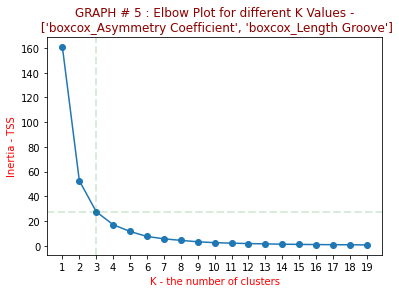

Inertia (TSS) at 5 clusters = 27.511595703398044 
 



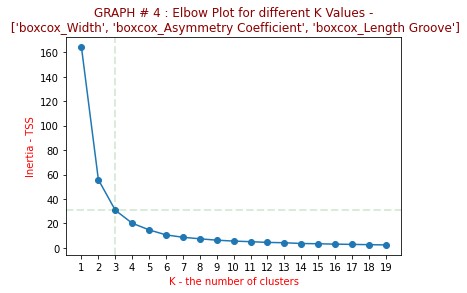

Inertia (TSS) at 5 clusters = 30.793692978114155 
 



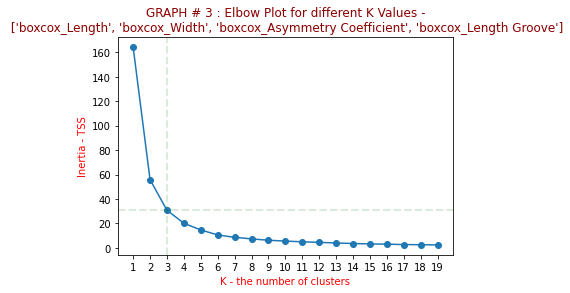

Inertia (TSS) at 5 clusters = 30.794365120285534 
 



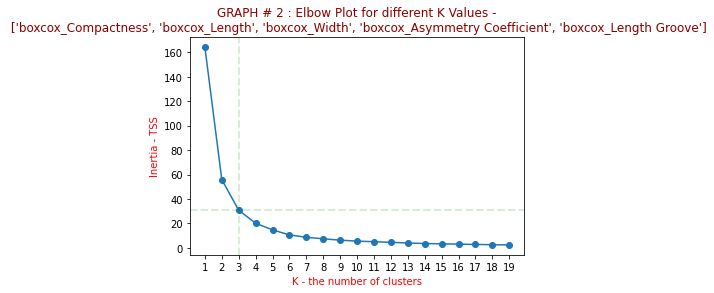

Inertia (TSS) at 5 clusters = 30.801801588386247 
 



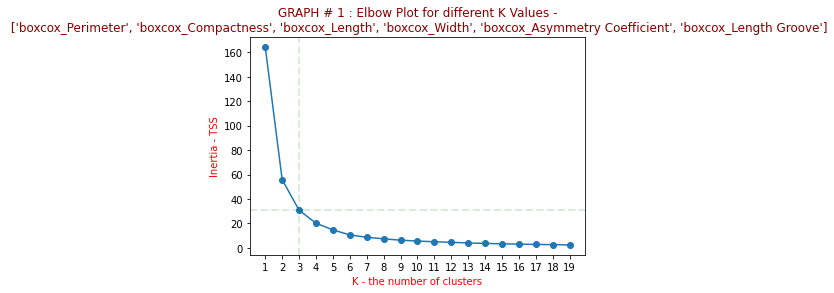

Inertia (TSS) at 5 clusters = 30.806883264642458 
 



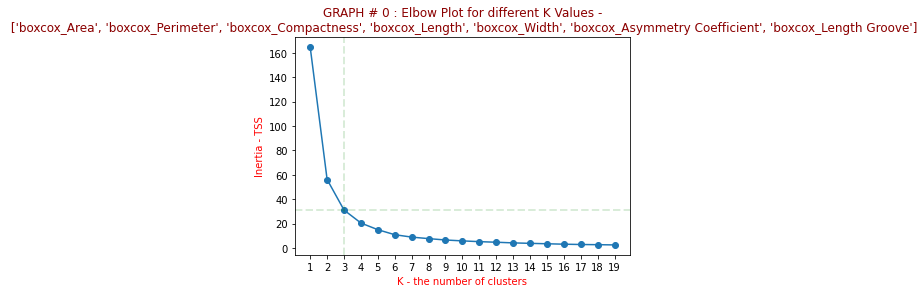

Inertia (TSS) at 5 clusters = 31.083692272935238 
 



In [56]:
for i in reversed(range(len(data_norm.columns))):
    r = optimial_k(data_norm.iloc[:, i:], i)
    

***Conclusions and Findings:***

3 types of wheats:  Kama, Rosa and Canadian

> 1. Looks like the most optimal number of cluster is at K = 3. For varying number of features, ***3 clusters is at the elbow point***, returning the minimal Inertia(TSS). Any more clusters only marginally decrease the total sum of squares. 

> 2. Furthermore, I would not select GRAPH 0 or GRAPH 1 because having Area and Perimeter features do not decrease the variance in our clusters. 

> 3. GRAPH 4, GRAPH 3, GRAPH2 all have TSS around ~30 at k = 3 clusters.  


> 4. Graph 6 only has one feature even though it has very little variance. This can lead to over reliance and might not capture the variation undoubtedly exits within a wheat. 

> 5. Graph 5 has two features with a TSS/Inertia of ~27.5. I think **GRAPH 5 is the best model**. 
    * Features  = [Asymmetry Coefficient, Length Groove] and k = 3. 
    * Additional features did not help in reducing the variation which may mean they might not actually have predictive power.. 
    * With 2 features and a reasonable amount of variation, I am not too worry about overfitting or over reliance. Also, these features do reduce TSS, so they must have some predictive power. 

In [36]:
wheat_feat = data_norm[['boxcox_Asymmetry Coefficient','boxcox_Length Groove']]
wheat_feat.head(5)

,boxcox_Asymmetry Coefficient,boxcox_Length Groove
0,1.260278,0.348877
1,0.266122,0.348365
2,1.586328,0.348069
3,1.287229,0.348021
4,0.580087,0.348796


Text(0, 0.5, 'Length of Groove')

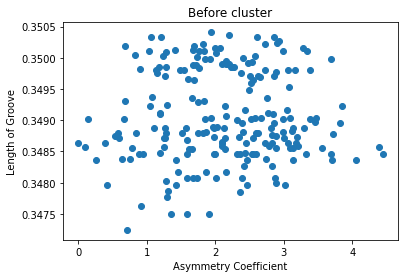

In [37]:
plt.scatter(wheat_feat['boxcox_Asymmetry Coefficient'], wheat_feat['boxcox_Length Groove'])
plt.title('Before cluster')
plt.xlabel('Asymmetry Coefficient')
plt.ylabel('Length of Groove')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


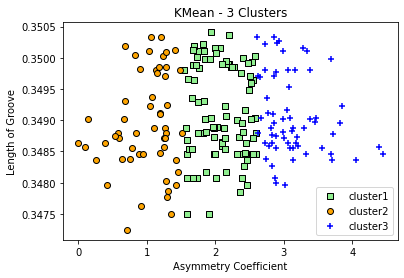

In [38]:
kmresult = KMeans(n_clusters = 3, n_init = 20, random_state = 3).fit_predict(wheat_feat)
plt.scatter(
    wheat_feat['boxcox_Asymmetry Coefficient'][kmresult ==0], wheat_feat['boxcox_Length Groove'][kmresult  ==0],
    c = 'lightgreen',
    marker = 's', edgecolor = 'black',
    label = 'cluster1'
)

plt.scatter(
    wheat_feat['boxcox_Asymmetry Coefficient'][kmresult ==1], wheat_feat['boxcox_Length Groove'][kmresult  ==1],
    c = 'orange',
    marker = 'o', edgecolor = 'black',
    label = 'cluster2'
)

plt.scatter(
    wheat_feat['boxcox_Asymmetry Coefficient'][kmresult ==2], wheat_feat['boxcox_Length Groove'][kmresult  ==2],
    c = 'blue',
    marker = '+', edgecolor = 'black',
    label = 'cluster3'
)
plt.title('KMean - 3 Clusters')
plt.xlabel('Asymmetry Coefficient')
plt.ylabel('Length of Groove')

plt.legend(scatterpoints=1)
plt.show()

In [39]:
from sklearn import datasets


iris = datasets.load_iris()
iris_data = iris.data
iris_names = iris.feature_names
iris_df = pd.DataFrame(iris_data, columns = iris_names)
iris_df[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### 3.a

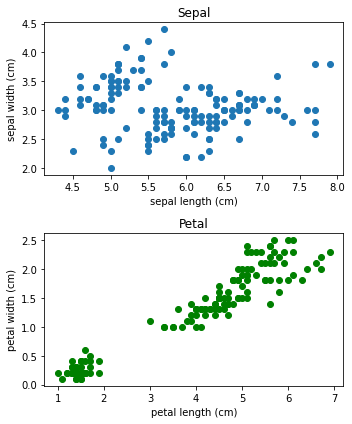

In [40]:
fig, ax = plt.subplots(2, figsize = (5, 6))

ax[0].scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
ax[0].set_title('Sepal')
ax[0].set_xlabel('sepal length (cm)')
ax[0].set_ylabel('sepal width (cm)')

ax[1].scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], color = 'green')
ax[1].set_title('Petal')
ax[1].set_xlabel('petal length (cm)')
ax[1].set_ylabel('petal width (cm)')

plt.tight_layout()

### 3a. Standardizing with MinMax Scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
    
Transform features by scaling each feature to a given range. (default is (0,1))

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

Formula:

 

$$\frac{x_i - Min(X)}{Max(X) - Min(X)}$$




$$ x_i*(max - min) + min$$

where min and max are 0 and 1 here. 

In [41]:
# minmax scale
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler() 
scaler.fit(iris_df)
scaler.data_max_
iris_minmax_scaled = pd.DataFrame(scaler.transform(iris_df), columns = iris_names)
#iris_minmax_scaled

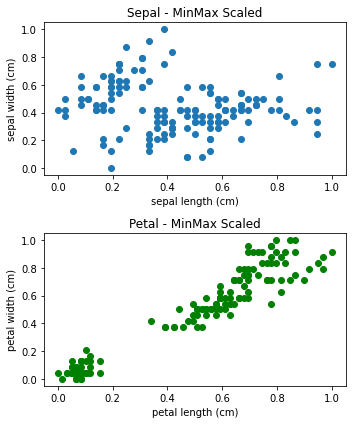

In [43]:
fig, ax = plt.subplots(2, figsize = (5, 6))

ax[0].scatter(iris_minmax_scaled['sepal length (cm)'], iris_minmax_scaled['sepal width (cm)'])
ax[0].set_title('Sepal - MinMax Scaled')
ax[0].set_xlabel('sepal length (cm)')
ax[0].set_ylabel('sepal width (cm)')

ax[1].scatter(iris_minmax_scaled['petal length (cm)'], iris_minmax_scaled['petal width (cm)'], color = 'green')
ax[1].set_title('Petal - MinMax Scaled')
ax[1].set_xlabel('petal length (cm)')
ax[1].set_ylabel('petal width (cm)')

plt.tight_layout()

### 3b. - subsetting

Direct says to get every 10th row. There are 150 rows, but in python index starts from 0 and ends at index 149. 

So I got the first row (index 0) and every 10th row afterwards. This means row 149 is not selected. 

I apply modular 10 to each index. If 0, then keep the row, else skip. This code will work for any number of rows in the dataset.

In [44]:
len(iris_df)

150

In [45]:
keepindex = [i for i in iris_df.index if i%10 == 0]
keepindex

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

In [46]:
subset_iris = iris_df.iloc[keepindex, :]
subset_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
10,5.4,3.7,1.5,0.2
20,5.4,3.4,1.7,0.2
30,4.8,3.1,1.6,0.2
40,5.0,3.5,1.3,0.3
50,7.0,3.2,4.7,1.4
60,5.0,2.0,3.5,1.0
70,5.9,3.2,4.8,1.8
80,5.5,2.4,3.8,1.1
90,5.5,2.6,4.4,1.2


### 3c. Manhattan Distance Matrix  + 3d. Euclidean distance 


**Manhattan**
$\sum\limits_{i = 1}^{n}\lvert{x_i - y_i}\rvert$

**Euclidean**
$\sqrt{\sum\limits_{i=1}^{n}(x_i - y_i) ^2}$

In [47]:
from scipy.spatial import distance

In [48]:
distance.cityblock(subset_iris['sepal length (cm)'],subset_iris['sepal width (cm)'])

42.2

In [49]:
def create_distance_matrix(data):
    manh= []
    euclid = []
    columns = data.columns
    
    for col in columns:
        manh_col = []
        euclid_col = []
        for j in columns:
            manh_col.append(np.linalg.norm(data[col] - data[j], ord = 1))
            euclid_col.append(np.linalg.norm(data[col] - data[j], ord = 2))
        manh.append(manh_col)
        euclid.append(euclid_col)
        
    return np.array(manh), np.array(euclid)

In [50]:
manhattan_matrix , euclidean_matrix = create_distance_matrix(subset_iris)

In [51]:
manhattan_matrix

array([[ 0. , 42.2, 31.2, 69.7],
       [42.2,  0. , 30.4, 27.5],
       [31.2, 30.4,  0. , 38.5],
       [69.7, 27.5, 38.5,  0. ]])

<function matplotlib.pyplot.show(close=None, block=None)>

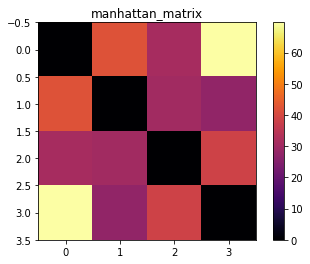

In [52]:
im = plt.imshow(manhattan_matrix, interpolation='nearest', cmap = 'inferno')
plt.colorbar(im)
plt.title('manhattan_matrix')
plt.show

***

In [53]:
euclidean_matrix

array([[ 0.        , 11.44727042,  9.26066952, 18.10938983],
       [11.44727042,  0.        ,  8.11048704,  8.12834547],
       [ 9.26066952,  8.11048704,  0.        , 10.644717  ],
       [18.10938983,  8.12834547, 10.644717  ,  0.        ]])

<function matplotlib.pyplot.show(close=None, block=None)>

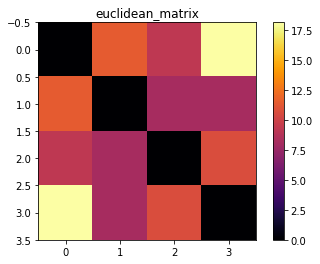

In [54]:
im = plt.imshow(euclidean_matrix, interpolation='nearest', cmap = 'inferno')
plt.colorbar(im)
plt.title('euclidean_matrix')
plt.show